In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [72]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('datasets/lung_cancer.csv')

In [73]:
# print first 5 rows of the dataset
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [74]:
# print last 5 rows of the dataset
data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [75]:
# number of rows and columns in the dataset
data.shape

(309, 16)

In [76]:
# getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [77]:
data.describe()


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [78]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## **Label Encoder**


In [79]:
label_encoder = preprocessing.LabelEncoder()

data['GENDER']= label_encoder.fit_transform(data['GENDER'])
  
data['GENDER'].unique()

array([1, 0])

In [80]:
data['LUNG_CANCER']= label_encoder.fit_transform(data['LUNG_CANCER'])
  
data['LUNG_CANCER'].unique()

array([1, 0])

In [81]:
# Here Male : Female = 1:0 & Cancer_positive : Cancer_negative = 1:0 
data.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
5,0,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,1,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,0,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,0,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0
9,1,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [82]:
data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1
308,1,62,1,1,1,2,1,2,2,2,2,1,1,2,1,1


In [83]:
# checking the distribution of Target Variable
data['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

1 --> Defective Lung

0 --> Healthy Lung

In [85]:
data.to_csv('datasets/prepocessed_lungs_data.csv')

## **Splitting the Features and Target**

In [86]:
X = data.drop(columns='LUNG_CANCER', axis=1)
Y = data['LUNG_CANCER']

In [87]:
print(X)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       0   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

In [88]:
print(Y)

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64


In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [90]:
print(X.shape, X_train.shape, X_test.shape)

(309, 15) (216, 15) (93, 15)


## **Model Training**

### **Linear_Regression**

In [91]:
model = LogisticRegression(max_iter=500)

In [92]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

## **Model Evaluation**

In [93]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [94]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9351851851851852


In [95]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [96]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9139784946236559


In [97]:
input_data = (0,61,1,1,1,1,2,2,1,1,1,1,2,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Lung Cancer')
else:
  print('The Person has Lung Cancer')

[0]
The Person does not have a Lung Cancer


C:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


                 Model  Test Accuracy  CV Accuracy
4           SVM_Linear       0.924731     0.934884
2          Naive Bayes       0.913978     0.911945
0  Logistic Regression       0.913978     0.930338
6        Random Forest       0.913978     0.893552
1        Decision Tree       0.903226     0.860888
5                  SVM       0.903226     0.884249
3                 k-NN       0.881720     0.902537


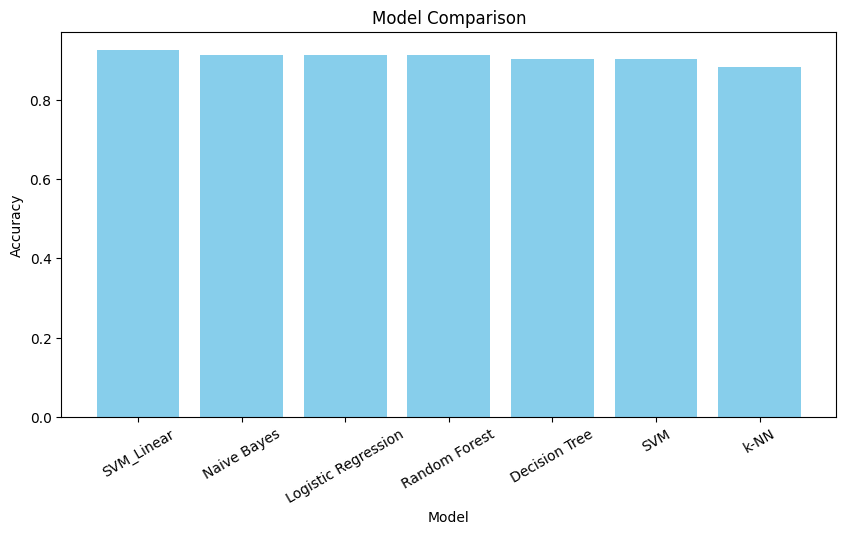

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Feature scaling for k-NN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(n_neighbors=3),
    "SVM_Linear": SVC(kernel='linear'),
    "SVM": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(n_estimators=10, max_depth=5)
}


# Train and evaluate models
results = []
for name, model in models.items():
    if name in ["k-NN", "SVM (Linear)","SVM"]:
        model.fit(X_train_scaled, Y_train)
        accuracy = model.score(X_test_scaled, Y_test)
        cv_score = np.mean(cross_val_score(model, X_train_scaled, Y_train, cv=5))
    else:
        model.fit(X_train, Y_train)
        accuracy = model.score(X_test, Y_test)
        cv_score = np.mean(cross_val_score(model, X_train, Y_train, cv=5))
    
    results.append({"Model": name, "Test Accuracy": accuracy, "CV Accuracy": cv_score})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)
print(results_df)

# Plot results
plt.figure(figsize=(10, 5))
plt.bar(results_df["Model"], results_df["Test Accuracy"], color="skyblue")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=30)
plt.show()


In [99]:
import pickle

In [100]:
feature_names=X_train.columns.tolist()
feature_names

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN']

In [101]:
feature_importance = pd.Series(model.feature_importances_, index=feature_names)
print("Feature Importance:\n", feature_importance.sort_values(ascending=False))


Feature Importance:
 ALCOHOL CONSUMING        0.198814
ALLERGY                  0.116376
AGE                      0.116344
COUGHING                 0.101905
PEER_PRESSURE            0.101390
SMOKING                  0.061021
FATIGUE                  0.054259
CHRONIC DISEASE          0.049907
WHEEZING                 0.045416
CHEST PAIN               0.038065
SWALLOWING DIFFICULTY    0.037812
ANXIETY                  0.032138
YELLOW_FINGERS           0.029598
SHORTNESS OF BREATH      0.011987
GENDER                   0.004968
dtype: float64


In [102]:
mod=models['Random Forest']
feature_importance = pd.Series(mod.feature_importances_, index=feature_names)
print("Feature Importance:\n", feature_importance.sort_values(ascending=False))


Feature Importance:
 ALCOHOL CONSUMING        0.198814
ALLERGY                  0.116376
AGE                      0.116344
COUGHING                 0.101905
PEER_PRESSURE            0.101390
SMOKING                  0.061021
FATIGUE                  0.054259
CHRONIC DISEASE          0.049907
WHEEZING                 0.045416
CHEST PAIN               0.038065
SWALLOWING DIFFICULTY    0.037812
ANXIETY                  0.032138
YELLOW_FINGERS           0.029598
SHORTNESS OF BREATH      0.011987
GENDER                   0.004968
dtype: float64


In [109]:
drp = [
    "YELLOW_FINGERS",
    "SHORTNESS OF BREATH",
    "GENDER"
]

In [110]:
x_train=X_train.drop(drp,axis=1)
x_test=X_test.drop(drp,axis=1)

                 Model  Test Accuracy  CV Accuracy
0  Logistic Regression       0.913978     0.925687
4           SVM_Linear       0.913978     0.930550
5                  SVM       0.903226     0.898097
6        Random Forest       0.903226     0.907294
1        Decision Tree       0.892473     0.856237
2          Naive Bayes       0.881720     0.916490
3                 k-NN       0.881720     0.902748


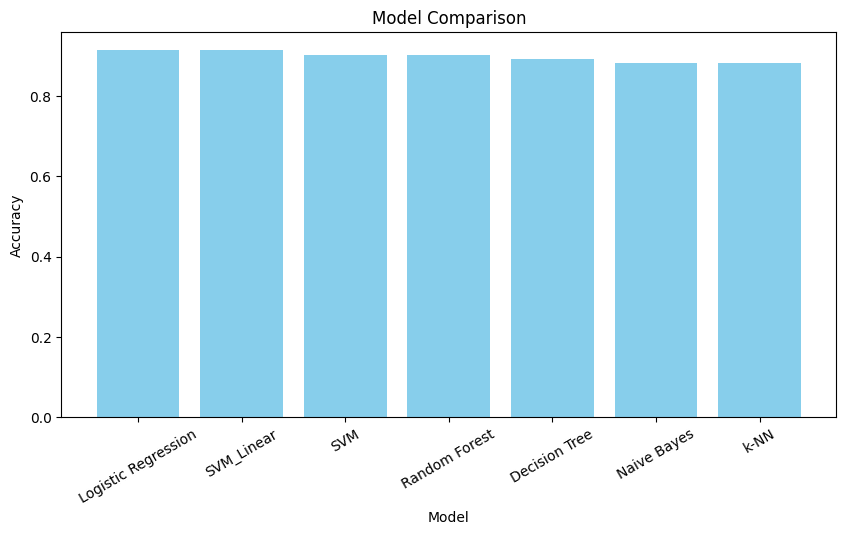

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Feature scaling for k-NN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(n_neighbors=3),
    "SVM_Linear": SVC(kernel='linear'),
    "SVM": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(n_estimators=10, max_depth=5)
}


# Train and evaluate models
results = []
for name, model in models.items():
    if name in ["k-NN", "SVM (Linear)","SVM"]:
        model.fit(X_train_scaled, Y_train)
        accuracy = model.score(X_test_scaled, Y_test)
        cv_score = np.mean(cross_val_score(model, X_train_scaled, Y_train, cv=5))
    else:
        model.fit(x_train, Y_train)
        accuracy = model.score(x_test, Y_test)
        cv_score = np.mean(cross_val_score(model, x_train, Y_train, cv=5))
    
    results.append({"Model": name, "Test Accuracy": accuracy, "CV Accuracy": cv_score})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)
print(results_df)

# Plot results
plt.figure(figsize=(10, 5))
plt.bar(results_df["Model"], results_df["Test Accuracy"], color="skyblue")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=30)
plt.show()


In [113]:
model=models["Logistic Regression"]

In [116]:
filename = 'models/Lungs_disease.pkl'
pickle.dump(model, open(filename, 'wb'))

In [117]:
x_train.columns

Index(['AGE', 'SMOKING', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
       'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')